In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import display

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Используем засечковый шрифт
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

def calculate_r2(x, y):
    
    popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

    y_true = y 
    y_pred = popt[0]*x + popt[1]

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

In [87]:
df1 = pd.DataFrame({})

df1["t"] = np.arange(0,270,30)

df1["A1"] = [0, 0, 0, 0, 0, 0, 0, 0, 0]

df1["A2"] = [0.17, 0.2, 0.23, 0.26, 0.28, 0.3, 0.32, 0.33, 0.35]
#df1["A2"] = [0.175, 0.21, 0.24, 0.265, 0.285, 0.30, 0.32, 0.33, 0.35]


df1["A3"] = [0.29, 0.355, 0.4, 0.45, 0.5, 0.53, 0.56, 0.58, 0.61]
df1["A4"] = [0.46, 0.53, 0.6, 0.66, 0.71, 0.76, 0.79, 0.82, 0.85]
df1["A5"] = [0.52, 0.61, 0.69, 0.77, 0.84, 0.89, 0.92, 0.96, 0.97]
df1["A6"] = [0.66, 0.77, 0.86, 0.92, 0.98, 1.00, 1.10, 1.15, 1.18]


df2 = pd.DataFrame({})

df2["C"] = [0,1,2,3,4,5]

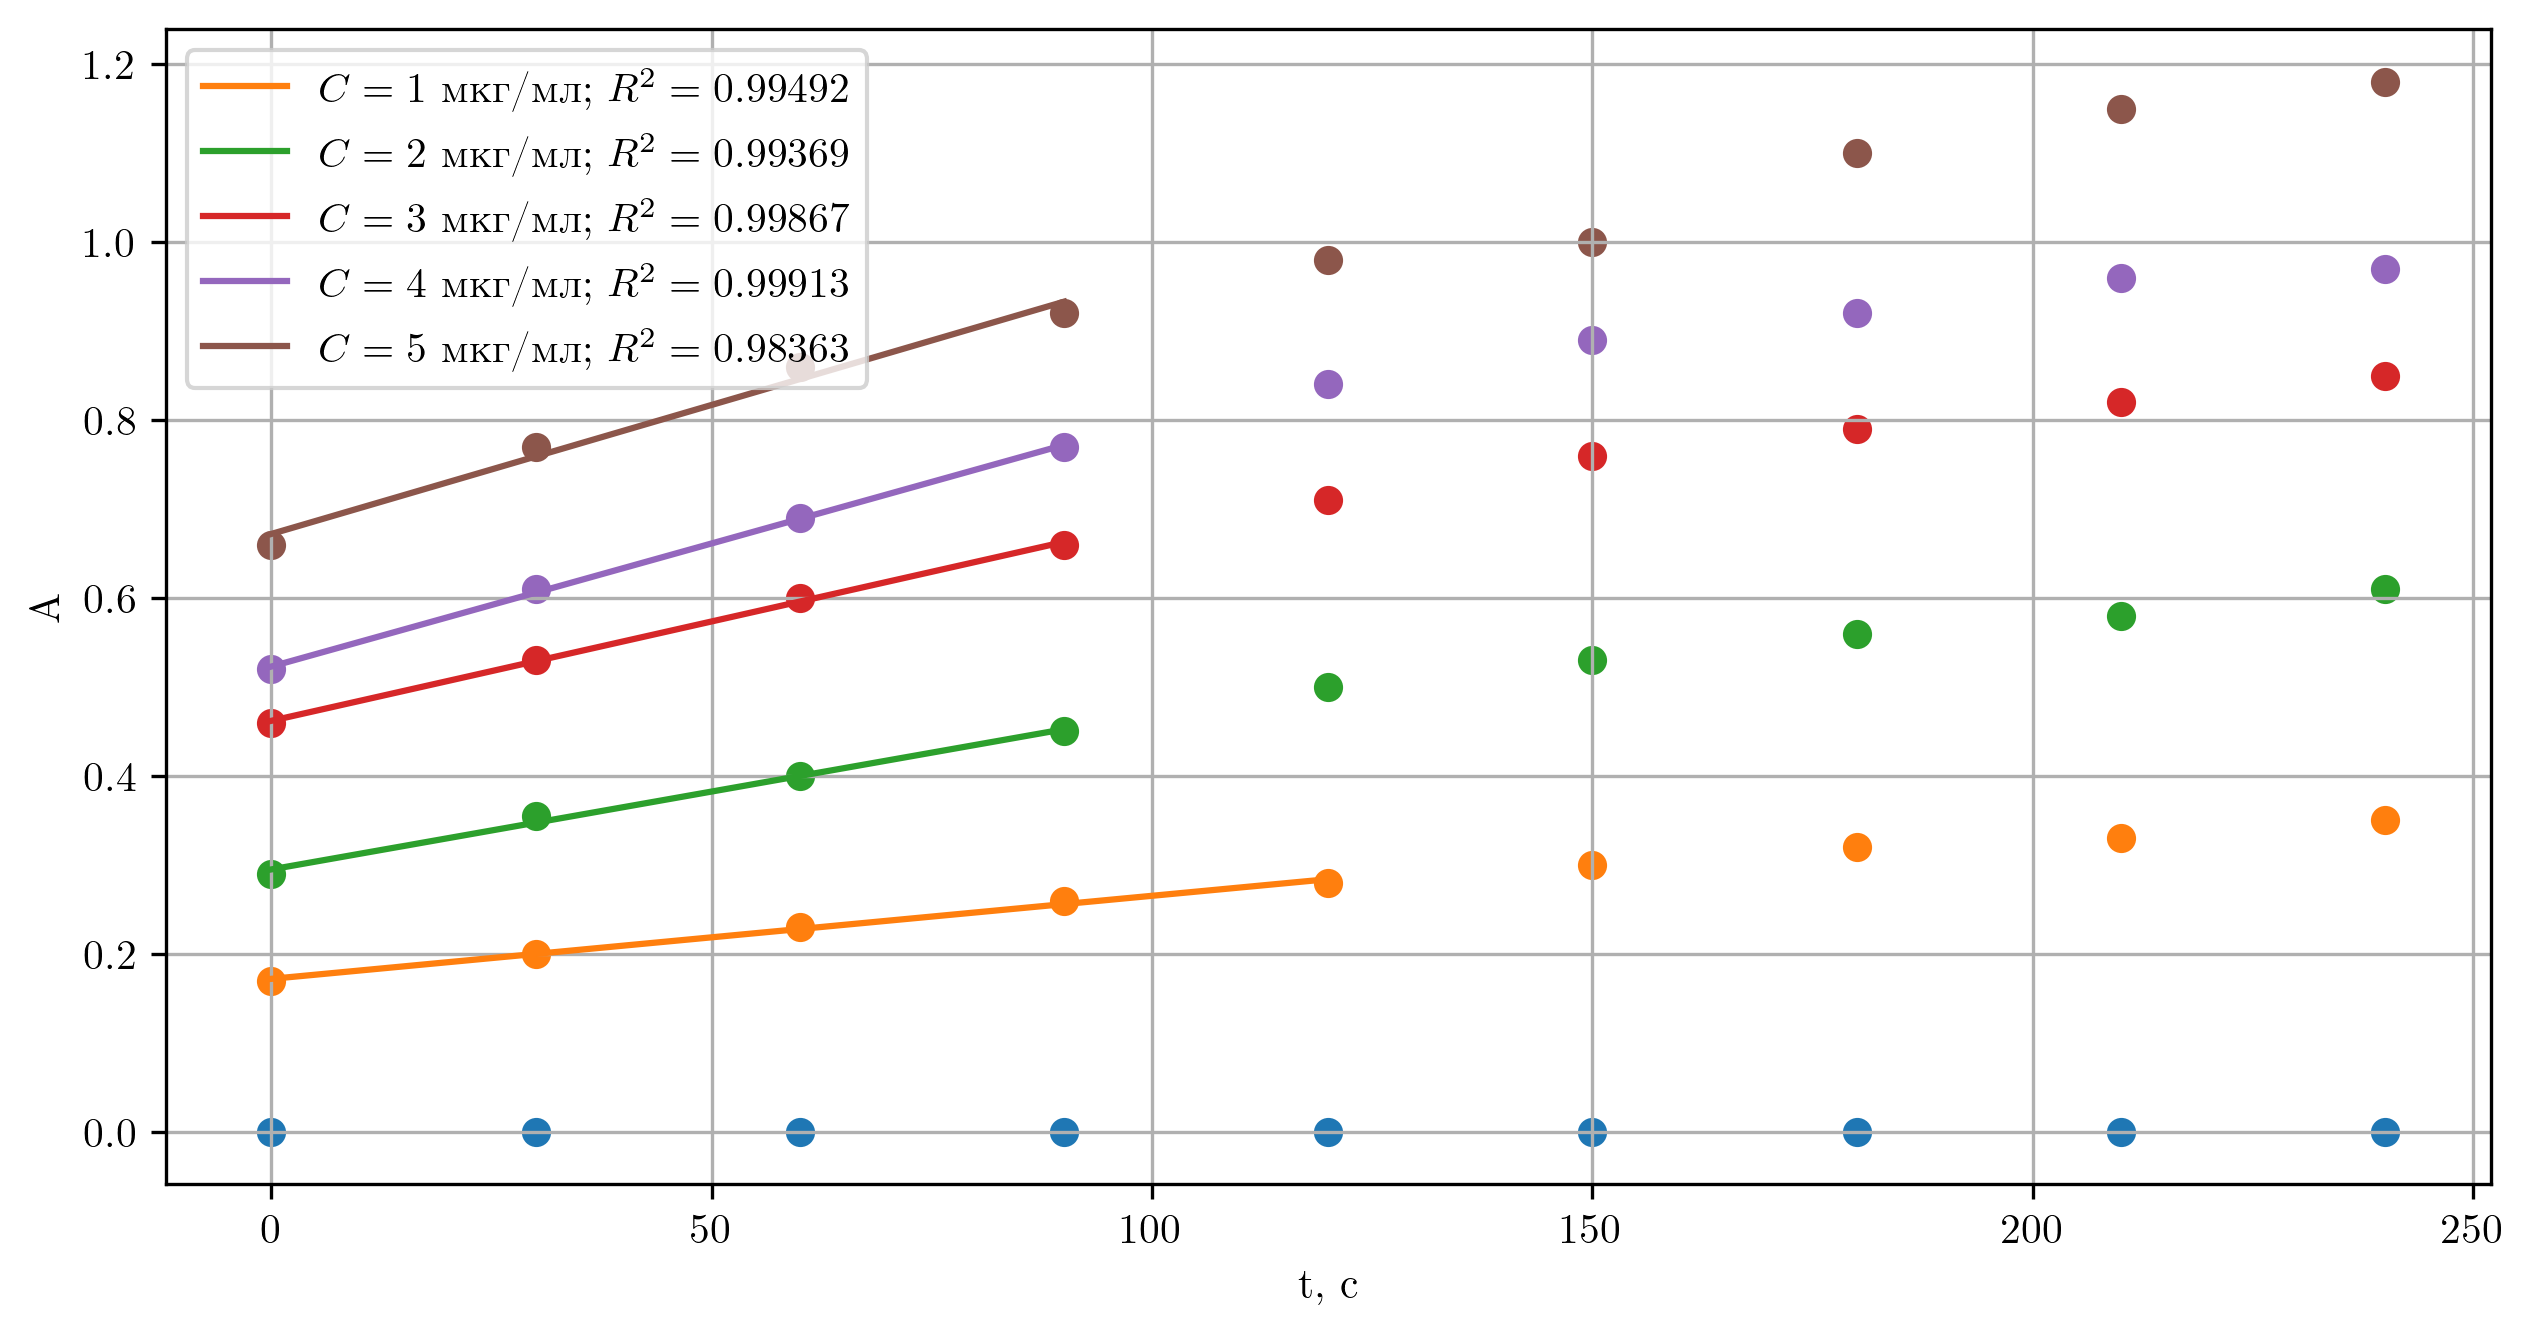

In [96]:
be = [
    [0,-1],
    [0,-4],
    [0,-5],
    [0,-5],
    [0,-5],
    [0,-5],
    [0,-5],
    [0,-5],
    [0,-5]
     ]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10,5), dpi=300)

tg = []
for i in range(1,7):
    
    exec(f"plt.scatter(df1.t, df1.A{i}, color = colors[{i}-1])")

    begin = be[i-1][0]
    end = be[i-1][1] 
    
    exec(f"xi = df1.t[{begin}:{end}]")
    exec(f"yi = df1.A{i}[{begin}:{end}]")
    #print(xi, yi)

    
    popt, pcov = curve_fit(lambda x, k, b: k*x + b, xi, yi)
    tg.append(popt[0])
    
    y = popt[0] * xi + popt[1]
    
    if i == 1: continue
    r2 = calculate_r2(xi,yi)
    plt.plot(xi,y,label = f"$C = {df2.C[i-1]} $ мкг/мл; $R^{{2}} = {r2:.5f}$", color = colors[i-1])
    

plt.xlabel("t, с")
plt.ylabel("A")
plt.grid()
plt.legend()
plt.savefig("images/хром_разные_конц.png")
plt.show()


df2["tg"] = tg

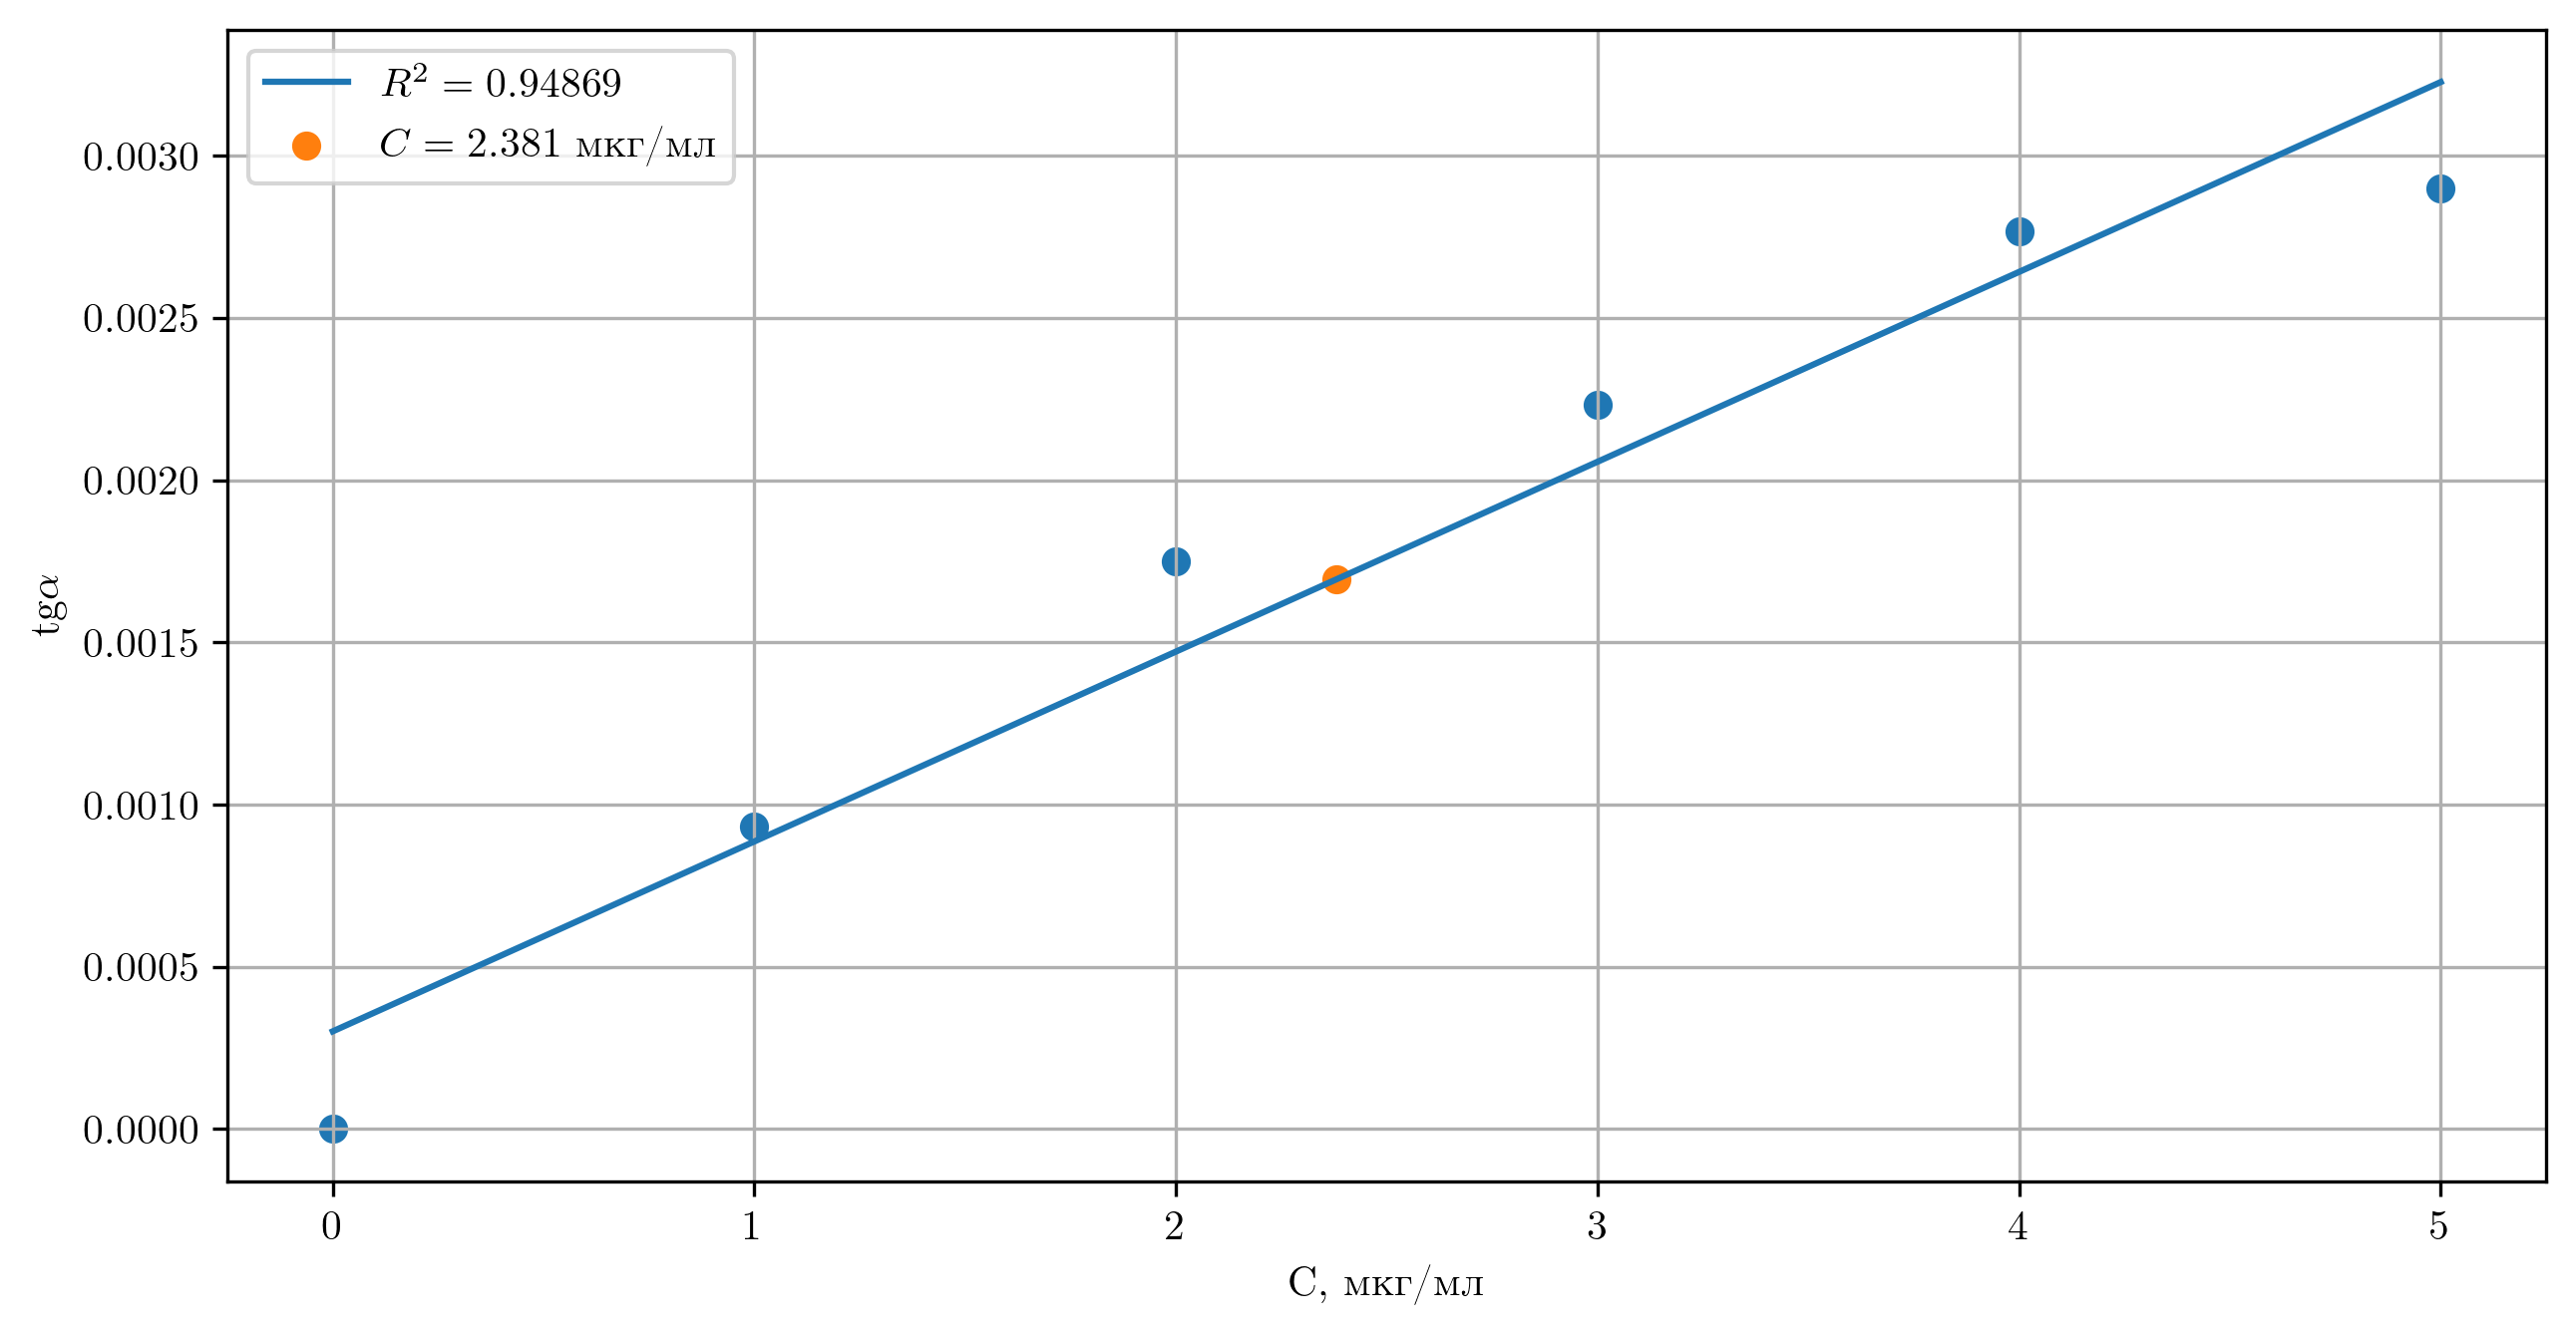

In [97]:
plt.figure(figsize=(10,5), dpi=300)

popt, pcov = curve_fit(lambda x, k, b: k*x + b, df2.C, df2.tg)

plt.scatter(df2.C, df2.tg)
r2 = calculate_r2(df2.C, df2.tg)
plt.plot(df2.C, df2.C*popt[0] + popt[1], label = f"$R^{{2}} = {r2:.5f}$")  

t = np.arange(0,270,30)
A = [0.52, 0.61, 0.68, 0.76, 0.8, 0.85, 0.89, 0.91, 0.93]
[k, b], _ =  curve_fit(lambda x, k, b: k*x + b, t, A)

y = k
x = (y - popt[1])/popt[0]
plt.scatter(x,y, label = f"$C = {x:.3f}$ мкг/мл")


plt.xlabel("C, мкг/мл")
plt.ylabel("tg$\\alpha$")
plt.grid()
plt.legend()
plt.savefig("images/хром_градуировка.png")
plt.show()



In [90]:
display(df1)

,t,A1,A2,A3,A4,A5,A6
0,0,0,0.17,0.290,0.46,0.52,0.66
1,30,0,0.20,0.355,0.53,0.61,0.77
2,60,0,0.23,0.400,0.60,0.69,0.86
3,90,0,0.26,0.450,0.66,0.77,0.92
4,120,0,0.28,0.500,0.71,0.84,0.98
5,150,0,0.30,0.530,0.76,0.89,1.00
6,180,0,0.32,0.560,0.79,0.92,1.10
7,210,0,0.33,0.580,0.82,0.96,1.15
8,240,0,0.35,0.610,0.85,0.97,1.18


In [91]:
display(df2)

,C,tg
0,0,0.000000
1,1,0.000933
2,2,0.001750
3,3,0.002233
4,4,0.002767
5,5,0.002900
